In [2]:
import numpy as np
import matplotlib.pyplot as plt


1. Initialisation du maillage - ici on veut trouver les points de notre maillag qui représentent des sites

CAS FULL NODES

grid: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


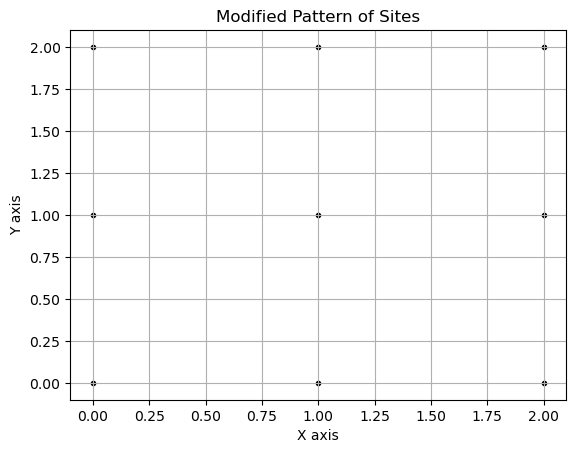

In [31]:
width =  3 #axe x, direction zigzag
height = 3 #axe y, direction armchair

#génération des la grille
def generate_grid(h, w):
    return [(x, y) for x in range(h) for y in range(w)]

grid = generate_grid(height, width)

# Affichage
for i in grid:
    plt.scatter(i[0], i[1], marker = '.', color='black')

plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Modified Pattern of Sites")
plt.grid()
print('grid:', grid)
plt.show()

2. Initialisation du hamiltonien en fonction des dimensions du flocon

\begin{align}
\mathcal{H} = \epsilon \sum_{x,y} \Bigl[\hat{a}^\dagger(x,y)\hat{a}_(x,y)\Bigr] 
&- t \sum_{x} \sum_{y}\Bigl[\hat{a}^\dagger(x,y)\hat{a}(x-1,y) + \hat{a}^\dagger(x+1,y)\hat{a}(x,y) + \text{c.h.} \Bigr] \\&- t \sum_{x}\Bigl[\sum_{y\text{ impair}}\hat{a}^\dagger(x,y)\hat{a}(x,y-1) + \sum_{y\text{ pair}} \hat{a}^\dagger(x,y+1)\hat{a}(x,y) + \text{c.h.}\Bigl]\nonumber
\end{align}

CAS FULL NODES

In [32]:
H = np.zeros((len(grid), len(grid)))
t = -1.0   

# Sauts direction zigzag (x):
for index in range(len(grid)):
        # Position du site
        site = grid[index]
        print(index,site)
        x = site[0]  # position x du site
        y = site[1]  # position y du site

        # Sauts direction zigzag:
        for index_new in range(len(grid)):
            if (x+1,y) == grid[index_new]:
                H[index, index_new] = t
                H[index_new, index] = t
            if (x-1,y) == grid[index_new]:
                H[index, index_new] = t
                H[index_new, index] = t

        # Sauts direction armchair
        if y % 2 == 0: #si l'index y est pair
            if x % 2 == 0: # si x est pair, la tranition permise est y+1
                for index_new in range(len(grid)):
                    if (x,y+1) == grid[index_new]:
                        H[index, index_new] = t
                        H[index_new, index] = t
            else: # si x est impair, la tranition permise est y-1
                for index_new in range(len(grid)):
                    if (x,y-1) == grid[index_new]:
                        H[index, index_new] = t
                        H[index_new, index] = t
            
        else: #si l'index de y est impair
            if x % 2 == 0: # si x est pair, la tranition permise est y-1
                for index_new in range(len(grid)):
                    if (x,y-1) == grid[index_new]:
                        H[index, index_new] = t
                        H[index_new, index] = t
            else: # si x est impair, la tranition permise est y+1
                for index_new in range(len(grid)):
                    if (x,y+1) == grid[index_new]:
                        H[index, index_new] = t
                        H[index_new, index] = t
             
print(H)
energies, vectors = np.linalg.eig(H)
print(energies)

0 (0, 0)
1 (0, 1)
2 (0, 2)
3 (1, 0)
4 (1, 1)
5 (1, 2)
6 (2, 0)
7 (2, 1)
8 (2, 2)
[[ 0. -1.  0. -1.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0. -1.  0.  0.  0. -1.  0. -1.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.  0. -1.]
 [ 0.  0.  0. -1.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.]]
[-2.19399328e+00 -1.59038253e+00  2.19399328e+00 -1.00000000e+00
 -8.10602811e-01  1.59038253e+00  1.00000000e+00  8.10602811e-01
  3.83335960e-62]


9 9


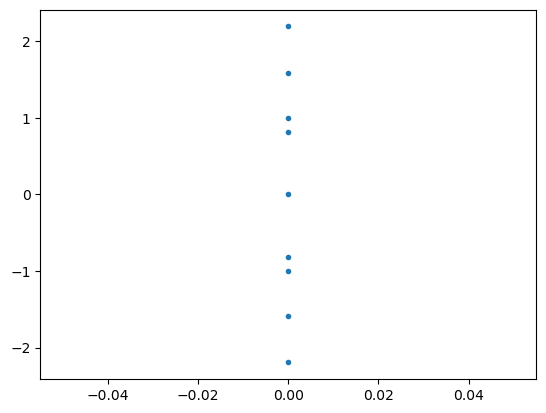

In [33]:
zero = np.zeros(len(energies))
print(len(zero), len(energies))
plt.scatter(zero, energies, marker=".")
plt.show()


CAS EMPTY NODES

sites: [(0, 1), (0, 2), (1, 0), (2, 1), (2, 2)]
grid: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


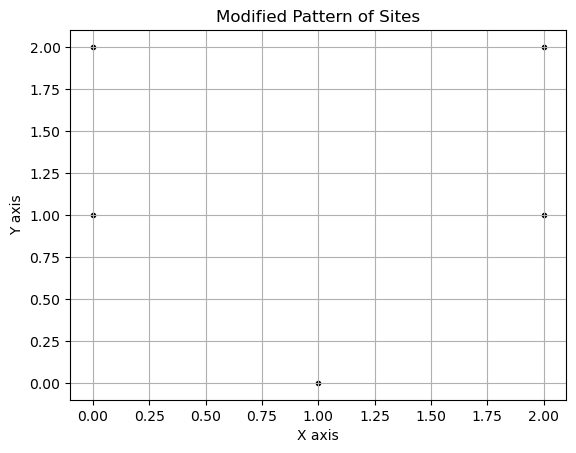

In [37]:
width = 3 #axe x, direction zigzag
height = 3 #axe y, direction armchair

#génération des la grille
def generate_grid(h, w):
    return [(x, y) for x in range(h) for y in range(w)]

grid = generate_grid(height, width)


sites = []

for x in range(width):
    if x % 2 == 0:  # Colonnes paires
        for y in range(height):
            if y % 4 in [1, 2]:  # 1,2,5,6,9,10, ...
                sites.append((x, y))
    else:  # Colonnes impaires
        for y in range(height):
            if y % 4 in [0, 3]:  # 3,4,7,8,11,12, ...
                sites.append((x, y))

# Affichage
for i in sites:
    plt.scatter(i[0], i[1], marker = '.', color='black')

plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Modified Pattern of Sites")
plt.grid()
print('sites:', sites)
print('grid:', grid)
plt.show()


In [39]:
H = np.zeros((len(grid), len(grid)))
t = -1.0   

# Sauts direction zigzag:
for index in range(len(grid)):
    if grid[index] in sites:
        print(index, grid[index])

        # Sauts direction zigzag:
        s = grid[index]
        x = s[0]  # position x du site
        y = s[1]  # position y du site

        for index_new in range(len(grid)):
            if (x+1,y) == grid[index_new]:
                H[index, index_new] = t
                H[index_new, index] = t
            if (x-1,y) == grid[index_new]:
                H[index, index_new] = t
                H[index_new, index] = t
print(H)

1 (0, 1)
2 (0, 2)
3 (1, 0)
7 (2, 1)
8 (2, 2)
[[ 0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.]]
